<a href="https://colab.research.google.com/github/burntato/PCVK_Genap_2023/blob/master/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

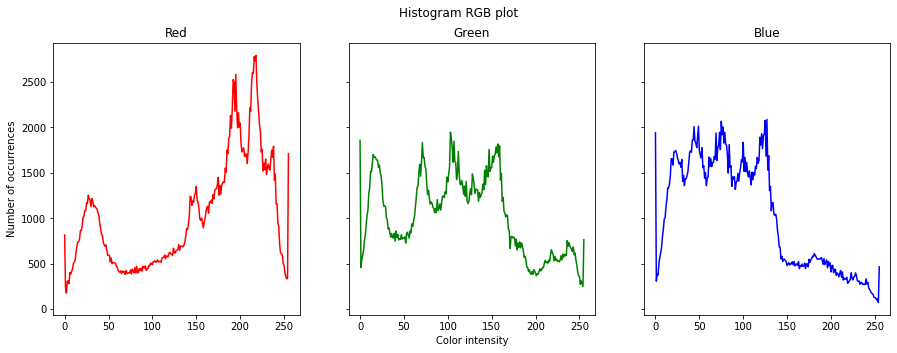

In [70]:
image = cv.imread('/content/drive/MyDrive/img/lena.jpg')  
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

pixel_counts = {}
colors = {'red': (255, 0, 0), 'green': (0, 255, 0), 'blue': (0, 0, 255)}
for i, (color, color_code) in enumerate(colors.items()):
    channel = cv.split(image)[i]
    pixel_counts[color] = np.zeros(256, dtype=np.uint64)
    for pixel_value in np.nditer(channel):
        pixel_counts[color][pixel_value] += 1

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,5))
fig.suptitle("Histogram RGB plot")
for i, (color, color_code) in enumerate(colors.items()):
    axes[i].plot(pixel_counts[color], color=color)
    axes[i].set_title(color.capitalize())
axes[1].set_xlabel("Color intensity")
axes[0].set_ylabel("Number of occurrences")

plt.show()

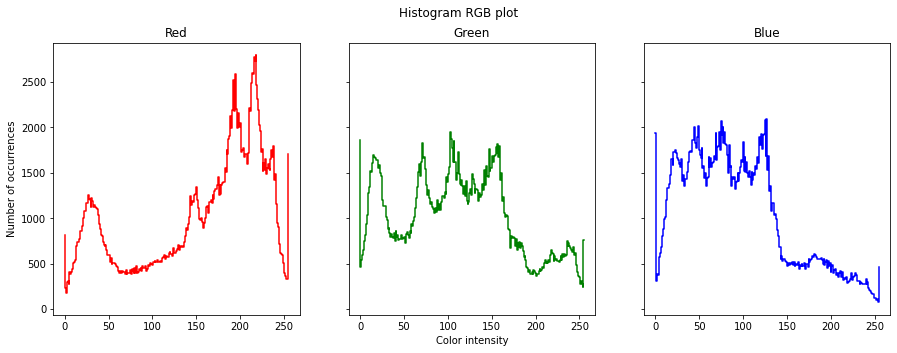

In [71]:
image = cv.imread('/content/drive/MyDrive/img/lena.jpg')  

image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

pixel_counts = {}
colors = {'red': (255, 0, 0), 'green': (0, 255, 0), 'blue': (0, 0, 255)}
for i, (color, color_code) in enumerate(colors.items()):
    channel = cv.split(image)[i]
    pixel_counts[color], _ = np.histogram(channel, bins=range(257))

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,5))
fig.suptitle("Histogram RGB plot")
for i, (color, color_code) in enumerate(colors.items()):
    axes[i].step(np.arange(256), pixel_counts[color], color=color[0], where='mid')
    axes[i].set_title(color.capitalize())
axes[1].set_xlabel("Color intensity")
axes[0].set_ylabel("Number of occurrences")

plt.show()

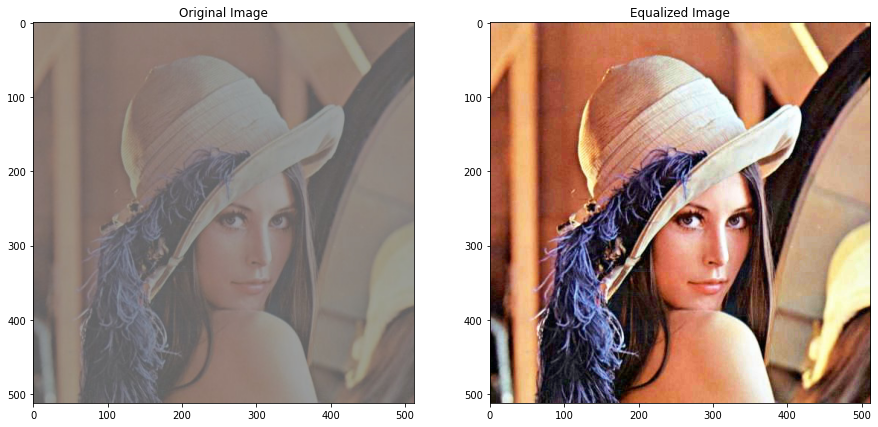

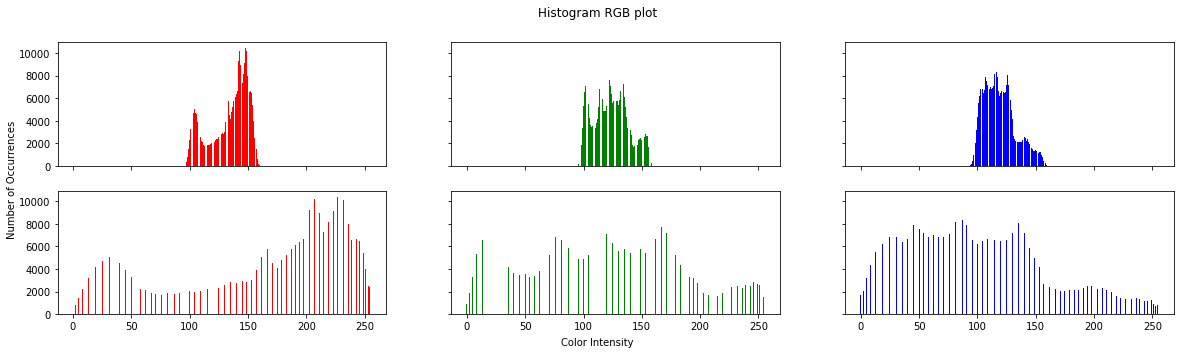

In [72]:
img = cv.imread('/content/drive/MyDrive/img/lena_lc.jpg')

def calculate_histogram(img):
    height, width, depth = np.shape(img) 
    hist = np.zeros((3, 256)) 
    for y in range(0, height):
        for x in range(0, width):
            hist[0][img[y][x][0]] += 1 
            hist[1][img[y][x][1]] += 1
            hist[2][img[y][x][2]] += 1 
    return hist

original_histogram = calculate_histogram(img)

# Convert to numpy array 
img_array = np.asarray(img)

# STEP 1: Normalized cumulative histogram
# Flatten image array and calculate histogram via binning 
histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Normalize 
num_pixels = np.sum(histogram_array) 
histogram_array = histogram_array / num_pixels

# Normalized cumulative histogram 
cumulative_histogram_array = np.cumsum(histogram_array)

# Pixel mapping 
transform_map = np.floor(255 * cumulative_histogram_array).astype(np.uint8)

# Transformation
img_list = list(img_array.flatten())

# Transform pixel value
eq_img_list = [transform_map[p] for p in img_list]

# Reshape 
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) 
equalized_img = eq_img_array

equalized_histogram = calculate_histogram(equalized_img)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(cv.cvtColor(equalized_img, cv.COLOR_BGR2RGB))
axs[1].set_title('Equalized Image')

# Plot histograms
names = np.arange(256) 
is_gray_image = np.all(img[:,:,0] == img[:,:,1]) and np.all(img[:,:,1] == img[:,:,2])
if (is_gray_image == False):
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True) 
    fig.suptitle('Histogram RGB plot') 
    fig.text(0.09, 0.5, 'Number of Occurrences', va='center', rotation='vertical') 
    fig.text(0.5, 0.04, 'Color Intensity', ha='center') 
    axs[0, 0].bar(names, original_histogram[2], color='red') 
    axs[0, 1].bar(names, original_histogram[1], color='green') 
    axs[0, 2].bar(names, original_histogram[0], color='blue') 
    axs[1, 0].bar(names, equalized_histogram[2], color='red') 
    axs[1, 1].bar(names, equalized_histogram[1], color='green')
    axs[1, 2].bar(names, equalized_histogram[0], color='blue') 
else:
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True) 
    fig.suptitle('Histogram RGB plot') 
    fig.text(0.09, 0.5, 'Number of Occurrences', va='center', rotation='vertical') 
    fig.text(0.5, 0.94, 'Color Intensity', ha='center') 

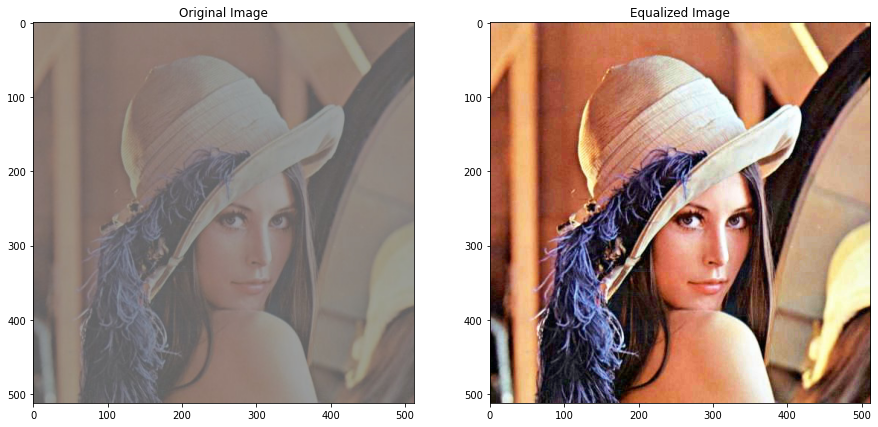

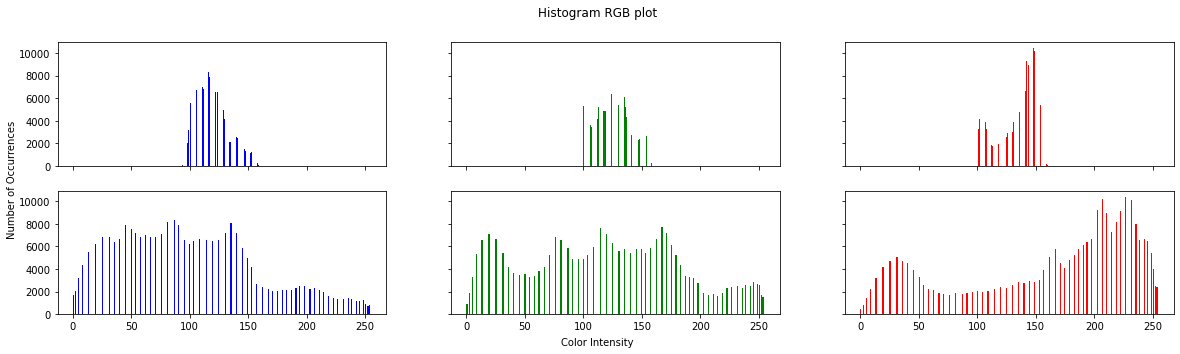

In [73]:
img = cv.imread('/content/drive/MyDrive/img/lena_lc.jpg')

def calculate_histogram(img):
  hist = np.zeros((3, 256))
  for i in range(3):
      hist[i] = cv.calcHist([img], [i], None, [256], [0, 256]).flatten()
  return hist

original_histogram = calculate_histogram(img)

histogram_array = np.bincount(img.ravel(), minlength=256)

num_pixels = np.sum(histogram_array) 
histogram_array = histogram_array / num_pixels

cumulative_histogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * cumulative_histogram_array).astype(np.uint8)

eq_img = transform_map[img]

equalized_histogram = calculate_histogram(eq_img)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(cv.cvtColor(eq_img, cv.COLOR_BGR2RGB))
axs[1].set_title('Equalized Image')

# Plot histogram
names = np.arange(256) 
is_gray_image = np.all(img[:,:,0] == img[:,:,1]) and np.all(img[:,:,1] == img[:,:,2])
if (is_gray_image == False):
  fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Number of Occurrences', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Color Intensity', ha='center') 
  for i, color in enumerate(['blue', 'green', 'red']):
      axs[0, i].hist(img[:, :, i].ravel(), bins=256, color=color)
      axs[1, i].hist(eq_img[:, :, i].ravel(), bins=256, color=color)
else:
  fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Number of Occurrences', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Color Intensity', ha='center')
  axs[0].hist(img.ravel(), bins=256, color='gray') 
  axs[1].hist(eq_img.ravel(), bins=256, color='gray') 

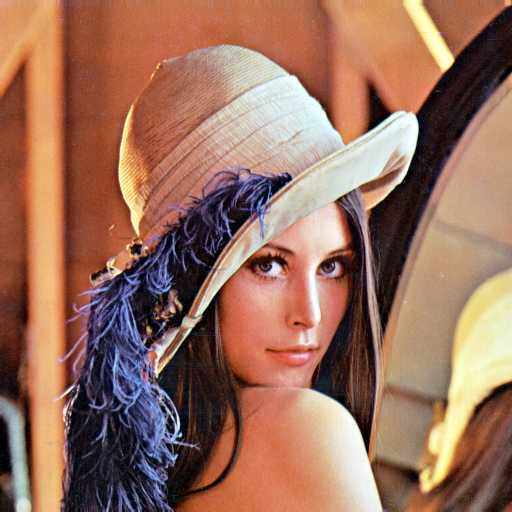

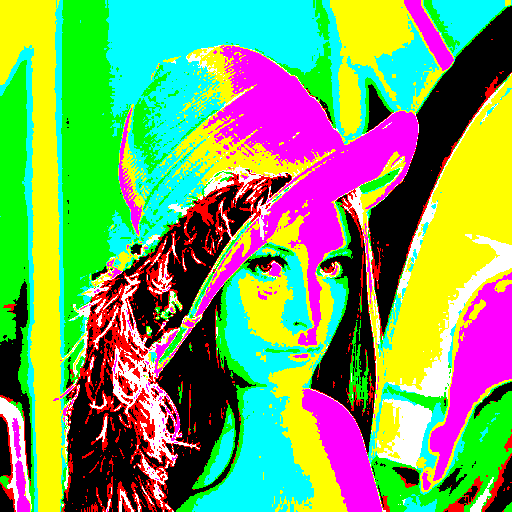

In [74]:
img = cv.imread('/content/drive/MyDrive/img/lena.jpg')

# Define color map
color_map = np.array([[0, 0, 0],    # black
                      [0, 255, 0],  # green
                      [255, 255, 0],# yellow
                      [0, 0, 255],  # blue
                      [0, 255, 255],# cyan
                      [255, 0, 255],# magenta
                      [255, 255, 255]], dtype=np.uint8) # white

def map_colors(img, color_map):
  # Reshape 
  img_flat = img.reshape(-1, 1, 3).astype(np.float32)
    
  criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    
  # k-means clustering
  K = len(color_map)
  ret, label, center = cv.kmeans(img_flat, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
    
  # Map color
  img_recolored_flat = color_map[label.flatten()]
  img_recolored = img_recolored_flat.reshape(img.shape)
    
  return img_recolored

img_mapped = map_colors(img, color_map)
cv2_imshow(img)
cv2_imshow(img_mapped)

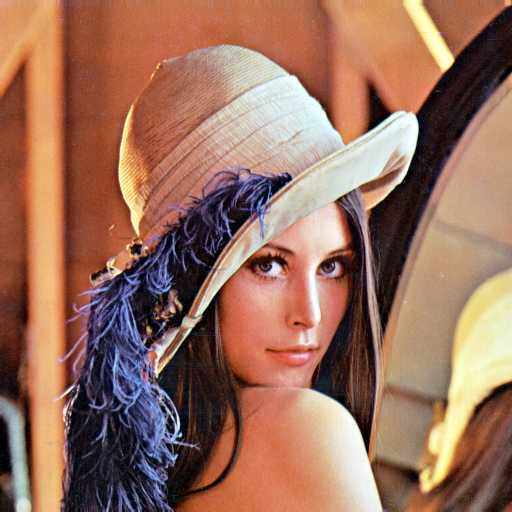

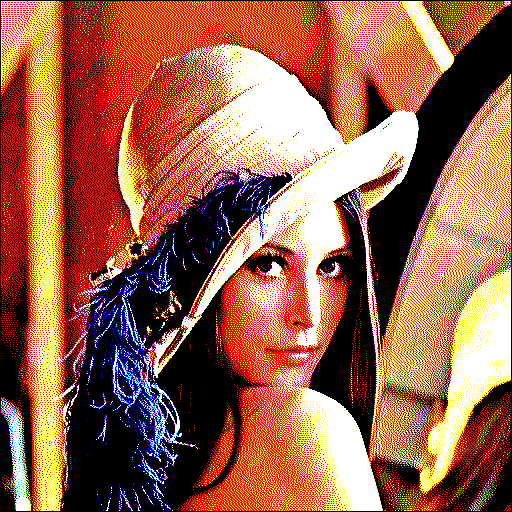

In [96]:
img = cv.imread('/content/drive/MyDrive/img/lena.jpg')

# Convert grayscale
dither = np.array([[0, 0, 0, 7, 5],
                   [3, 5, 7, 5, 3],
                   [1, 3, 5, 3, 1]]) / 48.0

out_img = np.zeros(img.shape, dtype=np.uint8)

# Loop 
for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        old_pixel = img[i, j].astype(float)
        new_pixel = np.round(old_pixel / 255.0) * 255
        error = old_pixel - new_pixel
        out_img[i, j] = new_pixel.astype(np.uint8)
        for k in range(-1, 2):
            for l in range(-2, 3):
                if k == 0 and l == 0:
                    continue
                if 0 <= i+k < img.shape[0] and 0 <= j+l < img.shape[1]:
                    img[i+k, j+l] = np.clip(img[i+k, j+l] + error * dither[k+1, l+2], 0, 255).astype(np.uint8)

original = cv.imread('/content/drive/MyDrive/img/lena.jpg')
cv2_imshow(original)
cv2_imshow(out_img)

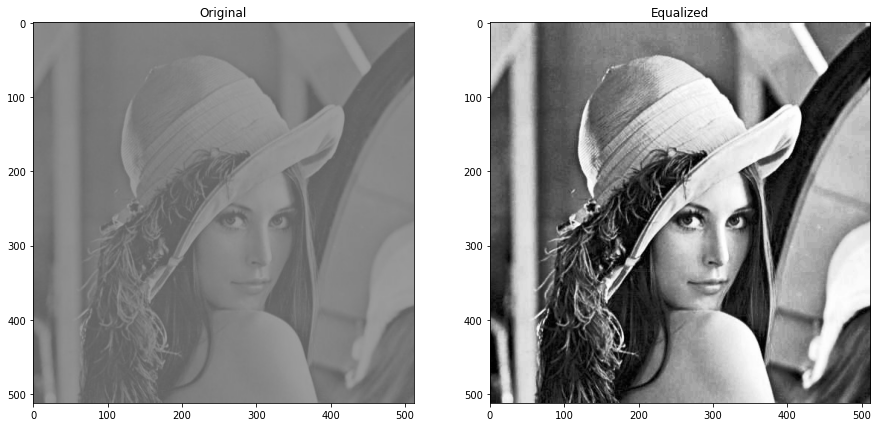

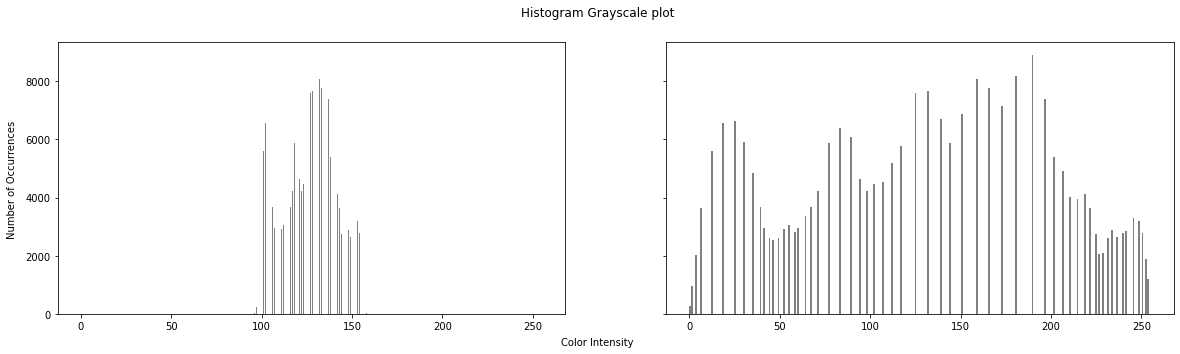

In [99]:
img = cv.imread('/content/drive/MyDrive/img/lena_lc.jpg')
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

def calculate_histogram(img):
    hist = np.zeros((256,))
    hist = cv.calcHist([img], [0], None, [256], [0, 256]).flatten()
    return hist

original_histogram = calculate_histogram(gray_img)

histogram_array = np.bincount(gray_img.ravel(), minlength=256)

num_pixels = np.sum(histogram_array) 
histogram_array = histogram_array / num_pixels

cumulative_histogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * cumulative_histogram_array).astype(np.uint8)

eq_img = transform_map[gray_img]

equalized_histogram = calculate_histogram(eq_img)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(cv.cvtColor(gray_img, cv.COLOR_GRAY2RGB))
axs[0].set_title('Original')
axs[1].imshow(cv.cvtColor(eq_img, cv.COLOR_GRAY2RGB))
axs[1].set_title('Equalized')

# histograms
names = np.arange(256) 
fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True) 
fig.suptitle('Histogram Grayscale plot') 
fig.text(0.09, 0.5, 'Number of Occurrences', va='center', rotation='vertical') 
fig.text(0.5, 0.04, 'Color Intensity', ha='center')
axs[0].hist(gray_img.ravel(), bins=256, color='gray') 
axs[1].hist(eq_img.ravel(), bins=256, color='gray') 

plt.show()

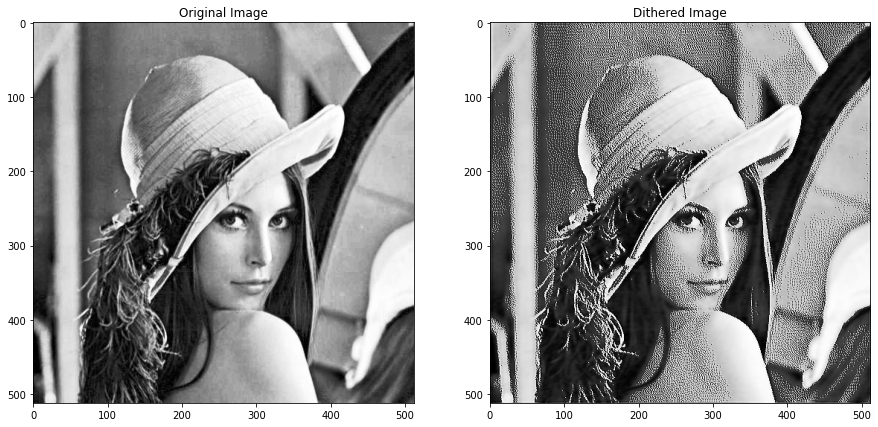

In [101]:
dither = np.array([[0, 0, 0, 7, 5],
                   [3, 5, 7, 5, 3],
                   [1, 3, 5, 3, 1]]) / 48.0

# copy the image and convert it to float32
output = eq_img.copy().astype(np.float32)

for y in range(1, output.shape[0]-1):
    for x in range(2, output.shape[1]-2):
        old_pixel = output[y, x]
        new_pixel = np.round(old_pixel/255.0)*255
        output[y, x] = new_pixel
        error = old_pixel - new_pixel

        for j in range(dither.shape[0]):
            for i in range(dither.shape[1]):
                if 0 <= y+j-1 < output.shape[0] and 0 <= x+i-2 < output.shape[1]:
                    output[y+j-1, x+i-2] += error * dither[j, i]

output = np.clip(output, 0, 255).astype(np.uint8)

# Display original and dithered
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(cv.cvtColor(eq_img, cv.COLOR_GRAY2RGB))
axs[0].set_title('Original')
axs[1].imshow(cv.cvtColor(output, cv.COLOR_GRAY2RGB))
axs[1].set_title('Dithered')
plt.show()